In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

mpl.style.use('classic')

import numpy as np
import pandas as pd

%matplotlib inline

# False discovery rate (FDR) as a function of prior probability , sensitivity , and specificity

\begin{align*}
FDR &= \frac{N(1-r)(1-y)}{N(1-r)(1-y) + Nrx} \\
    &= \frac{1}{1 + \frac{rx}{(1-r)(1-y)}}
\end{align*}

* $N$: population size. It would be cancelled, so we don't need to know its exact value.
* $r$: prior probability. Concretely, $r$ could be thought of, for example, as the probability of having a disease in the population in the context of diagnostic method development. I used rate in this notebook to mean this variable.
* $x$: sensitivity
* $y$: specificity

The derivation of this relationship is straightforward. Please refer to Figure 1 in http://rsos.royalsocietypublishing.org/content/1/3/140216, or a confusion table such as the one on my blog post, [On the p-value](http://zyxue.github.io/2018/05/15/on-p-value-and-FDR.html).

In [2]:
def fdr(rate, sensitivity, specificity):
    part = rate * sensitivity / ((1 - rate) * (1 - specificity))
    return 1 / (1 + part)

In [3]:
# Confirm the FDR calculation is correct against to a particular example reported in Figure 1 of 
# http://rsos.royalsocietypublishing.org/content/1/3/140216.
assert '{0:.02f}'.format(fdr(rate=0.01, sensitivity=0.8, specificity=0.95)) == '0.86'

# With specificity fixed

In [4]:
# %matplotlib notebook

#### A concrete example at low specificity

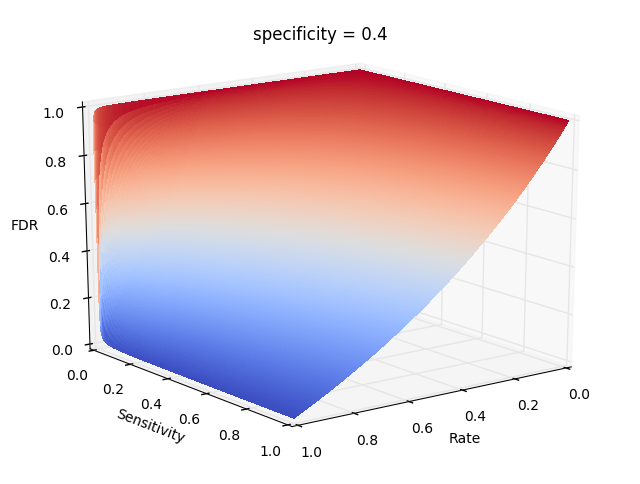

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')

spec = 0.4

rate_list = np.linspace(0.0001, 0.999, 300)
sens_list = np.linspace(0.0001, 0.9999, 300)

X, Y = np.meshgrid(rate_list, sens_list)
Z = fdr(rate=X, sensitivity=Y, specificity=spec)

surf = ax.plot_surface(X, Y, Z,
                       rstride=1, cstride=1,
                       vmin=0, vmax=1,
                       cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=1)
ax.set_xlabel('Rate')
ax.set_ylabel('Sensitivity')
ax.set_zlabel('FDR')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.view_init(elev=18, azim=53)

ax.set_title('specificity = {0}'.format(spec))
# plt.subplots_adjust(wspace=0, hspace=0)

As seen, at high sensitivity, the FDR almost increase linearly with increase of rate

#### A concrete example at high specificity

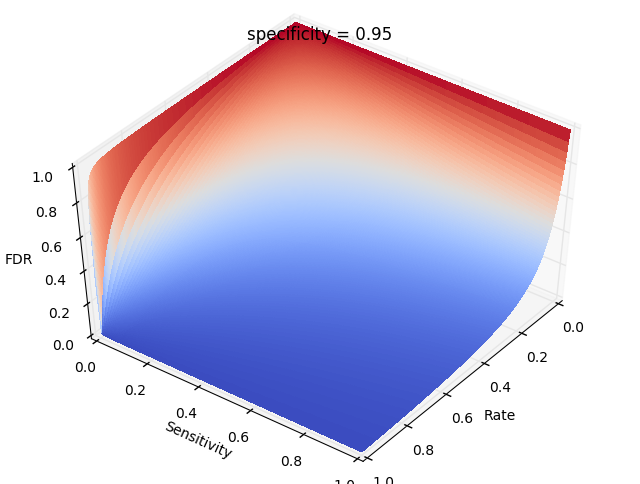

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')

spec = 0.95

rate_list = np.linspace(0.0001, 0.999, 300)
sens_list = np.linspace(0.0001, 0.9999, 300)

X, Y = np.meshgrid(rate_list, sens_list)
Z = fdr(rate=X, sensitivity=Y, specificity=spec)

surf = ax.plot_surface(X, Y, Z,
                       rstride=1, cstride=1,
                       vmin=0, vmax=1,
                       cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=1)
ax.set_xlabel('Rate')
ax.set_ylabel('Sensitivity')
ax.set_zlabel('FDR')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.view_init(elev=48, azim=37)

ax.set_title('specificity = {0}'.format(spec))
# plt.subplots_adjust(wspace=0, hspace=0)

As seen, even with high sensitivity and high specificity, when the rate is low, the FDR is still remarkably high, which would be more apparent taking a cross section at $r=0.01$ as shown below

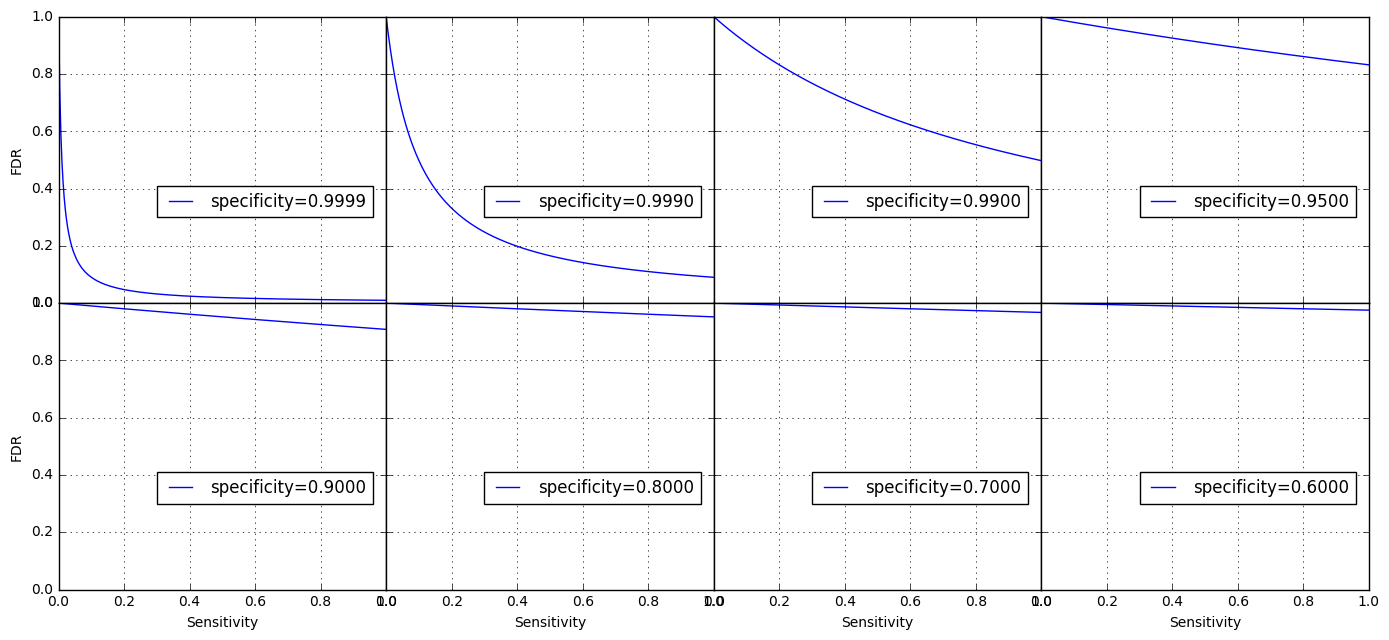

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(14, 6.5), sharex=True, sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
axes = axes.ravel()

rate = 0.01
xs_sens =  np.linspace(0.0001, 0.9999, 300)
specificities = [0.9999, 0.999, 0.99, 0.95, 0.9, 0.8, 0.7, 0.6]

for k, ax in enumerate(axes):
    ax = axes[k]
    spec = specificities[k]
    
    ax.plot(xs_sens, fdr(rate, xs_sens, spec), label='specificity={0:.4f}'.format(spec))
    ax.set_xlabel('Sensitivity')
    if k == 0 or k == 4:
        ax.set_ylabel('FDR')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.legend(loc=(0.3, 0.3))
    ax.grid()
plt.tight_layout()

#### Now we do a specificity sweep

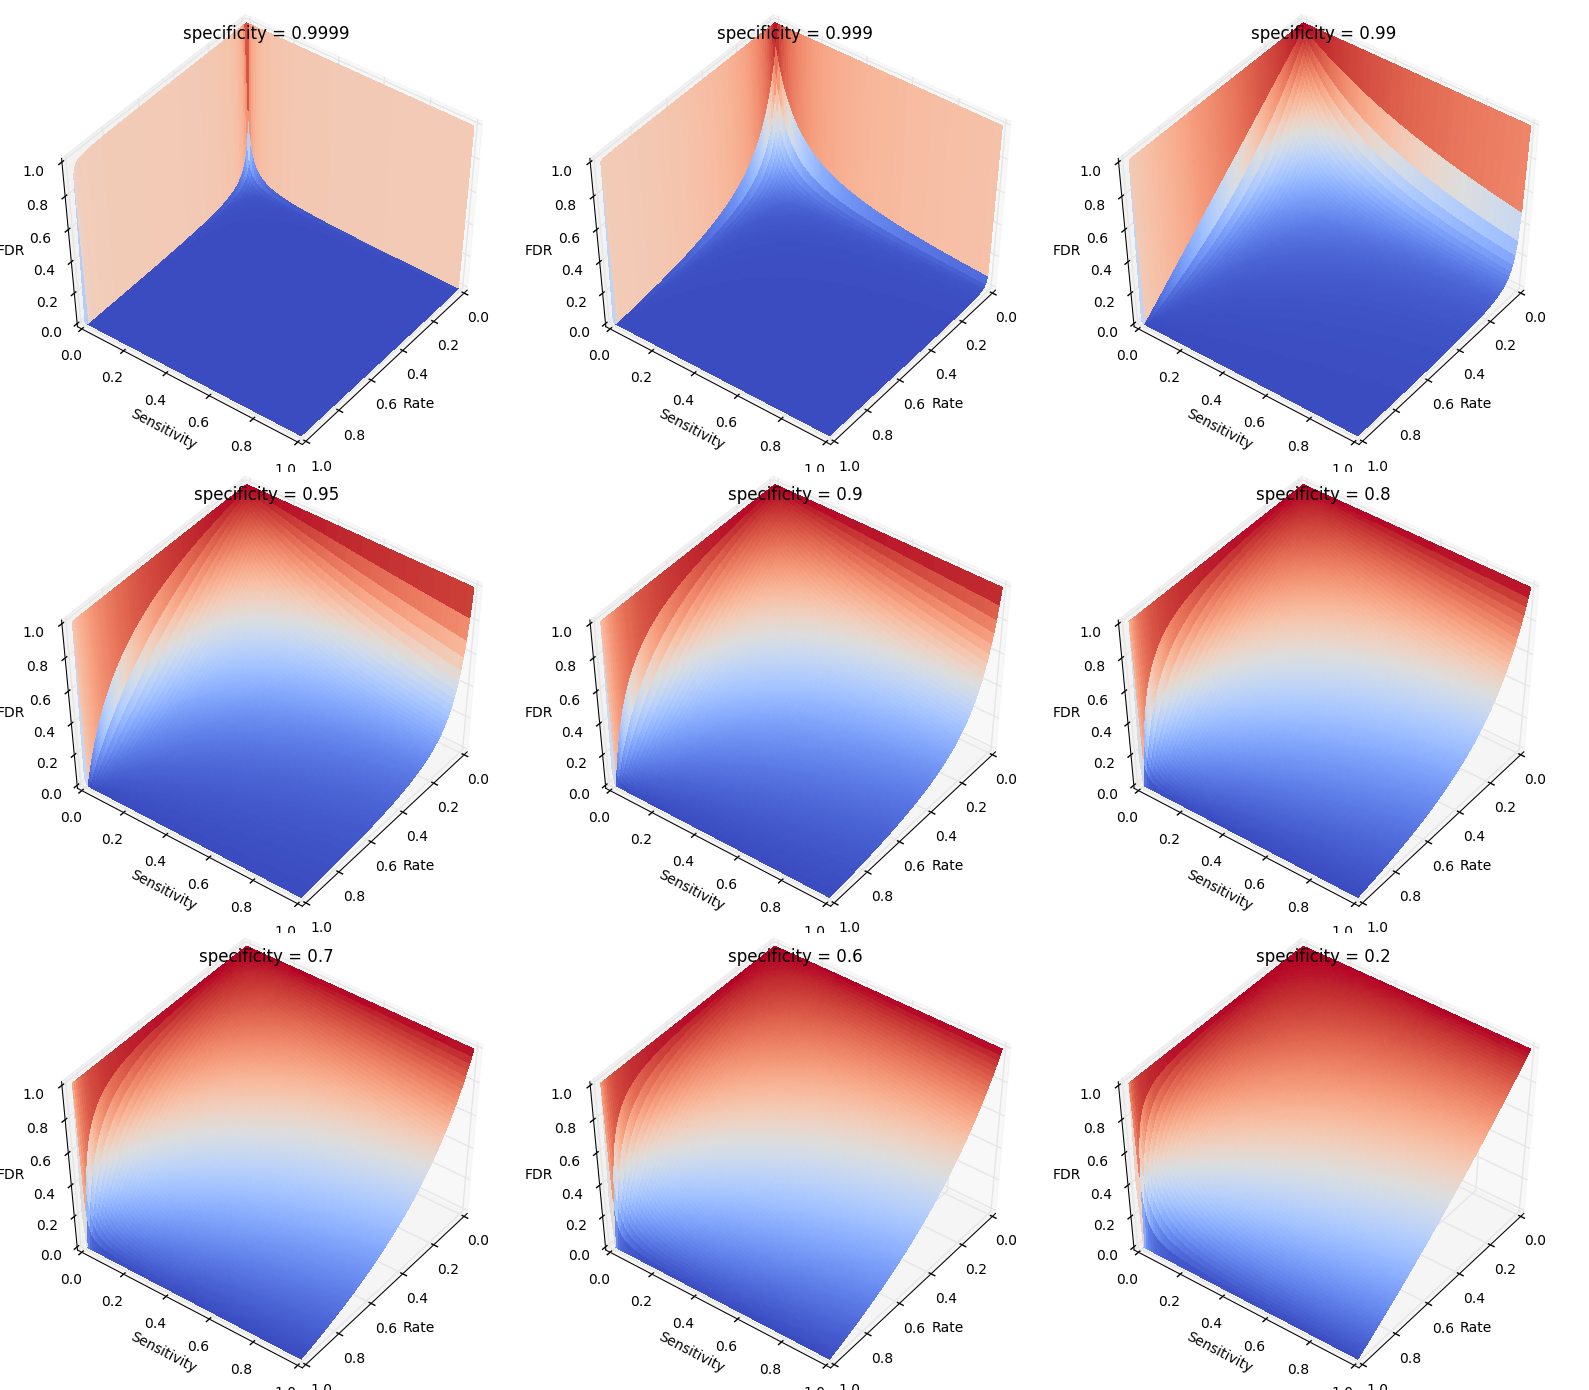

In [9]:
fig = plt.figure(figsize=(16, 14))

specificities = [0.9999, 0.999, 0.99, 0.95, 0.9, 0.8, 0.7, 0.6, 0.2]
for k, spec in enumerate(specificities):
    ax = fig.add_subplot(3, 3, k + 1, projection='3d')
    
    rate_list = np.linspace(0.0000001, 0.9999999, 100)
    sens_list = np.linspace(0.0000001, 0.9999999, 100)

    X, Y = np.meshgrid(rate_list, sens_list)
    Z = fdr(rate=X, sensitivity=Y, specificity=spec)

    surf = ax.plot_surface(X, Y, Z,
                           rstride=1, cstride=1,
                           vmin=0, vmax=1,
                           cmap=cm.coolwarm,
                           linewidth=0, antialiased=False, alpha=1)
    ax.set_xlabel('Rate')
    ax.set_ylabel('Sensitivity')
    ax.set_zlabel('FDR')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)

    ax.view_init(elev=48, azim=37)
    ax.set_title('specificity = {0}'.format(spec))
# plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()

In general, the area around low rate and high sensitivity is what's interested.

# With rate fixed

#### Rate sweep

In [10]:
xs_sens = np.linspace(0.01, 0.99, 50)
ys_spec = np.linspace(0.01, 0.99, 50)
X, Y = np.meshgrid(xs_sens, ys_spec)
xs = X.ravel()
ys = Y.ravel()
zs = fdr(rate=0.1, sensitivity=xs_sens, specificity=ys_spec)

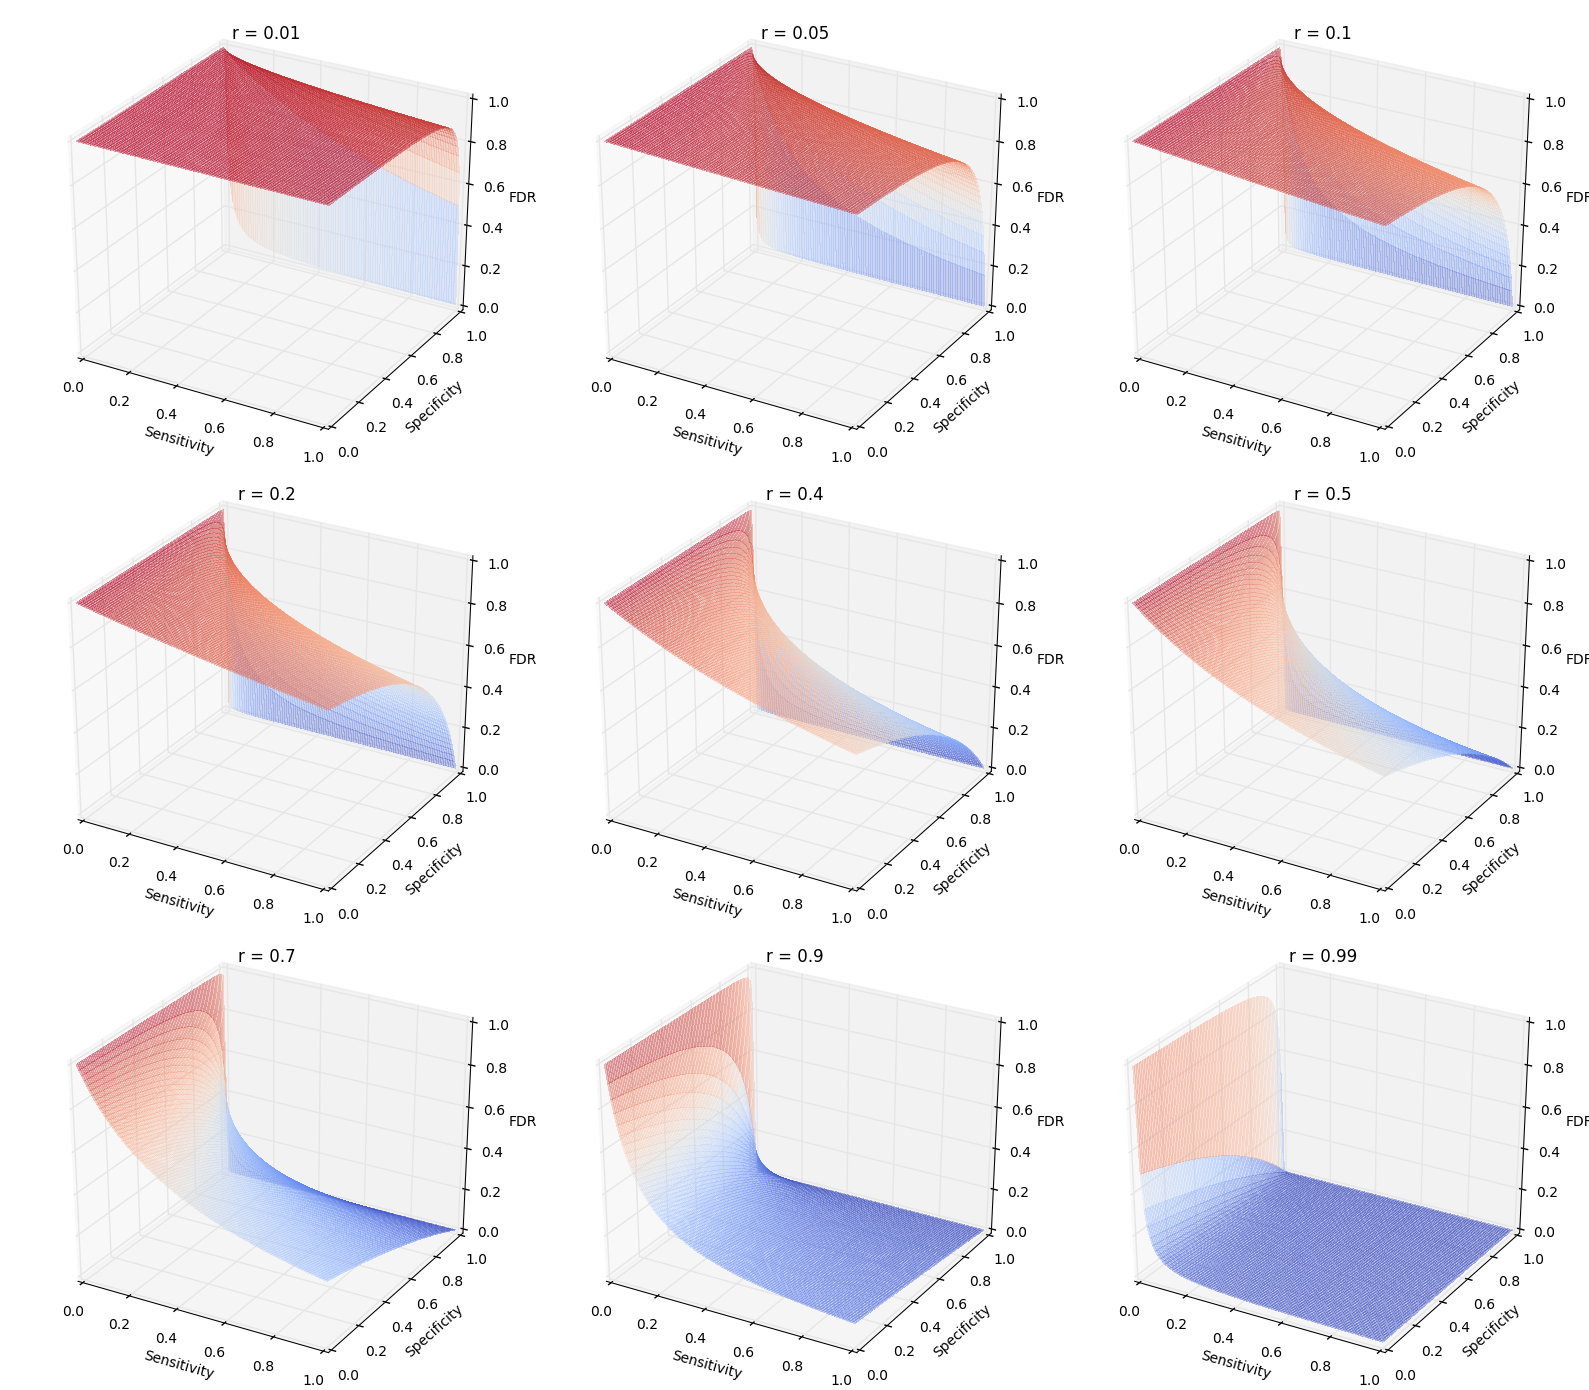

In [11]:
fig = plt.figure(figsize=(16, 14))
# ax = fig.gca(projection='3d')

for k, i in enumerate([0.01, 0.05, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 0.99]):
    r = i

    ax = fig.add_subplot(3, 3, k + 1, projection='3d')
    
    xs = np.linspace(0.0001, 0.9999, 100)
    ys = np.linspace(0.0001, 0.9999, 100)

    X, Y = np.meshgrid(xs, ys)
    Z = fdr(rate=r, sensitivity=X, specificity=Y)

    surf = ax.plot_surface(X, Y, Z,
                           rstride=1, cstride=1,
                           vmin=0, vmax=1,
                           cmap=cm.coolwarm,
                           linewidth=0, antialiased=False, alpha=0.3)
    ax.set_xlabel('Sensitivity')
    ax.set_ylabel('Specificity')
    ax.set_zlabel('FDR')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    # Customize the view angle so it's easier to understand the plot.
#     ax.view_init(elev=10, azim=20)
    ax.set_title('r = {0}'.format(r))
# plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()

Note:

1. When $r$ (prior probability) is low, meaning the occurence of it in the population is rare, then sensitivity and specificity need to be very high to a reasonable FDR. See the first figure that FDR keep being high (flat) in most of the area of the (sensitivity, specificity) combinations untill they are both close to 1 (a sharp drop).
1. On the other end, when $r$ is high, then the requirement of sensitivity and specificity wouldn't be as demanding to ensure a good FDR. See the plateau in most of the area but at a low FDR level.